In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('/content/mymoviedb.csv', lineterminator='\n')
display(df.head(10))

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [ ]:
df.info() #to get summary of the data

In [ ]:
#to check data duplicaton
df.duplicated().sum()  #no duplicated data found

In [50]:
#statistical analysis
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# **. Exploration Summary**

. We have a dataframe consisting **9827** rows and **9** columns
. Our dataset looks a bit tidy with no NaNs nor duplicated values

. **Release_Date Column** needs to be casted into date time and to extract only the year value

. **Overview Origional_Language and Poter_Url columns** wouldn't be so useful duting analysis, so we'll drop them

. There is noticable **outliers **in popularity columns

. **Vote_Average** better be categorised for the proper

. **Genre column** has comma seperated values and white spaces that need to be handled and casted into category

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

In [ ]:
#to extract the year only from date
df['Release_Date'] = df['Release_Date'].dt.year


In [53]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df['Release_Date'].dtypes  #years has been extracted and now it's dtype is int()

# Now Dropping the Inneccessary Columns from our data

In [ ]:
 df.drop(columns = ['Overview','Original_Language','Poster_Url'],axis = 1,inplace=True)

In [56]:
df.head() #removed

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


  # Categorizing the Vote_Average Column

we would cut the Vote_Avergae values and make categories: popular,average,below_avg,not_popluar
to describe it more using catigorize_col() function

In [ ]:
#i will make different functions for same tasks
def categorical_col(vote):
    if vote <= 3:
        return 'not popular'
    elif vote >=3 and vote <=5:
        return 'below average'
    elif vote >=5 and vote <=7:
        return 'average'
    else:
        return 'popular'
        #Same function but with different logic
# def categorical_col(df,col,labels):
#   edges = [df[col].describe().min(),
#             df[col].describe().[25%],
#             df[col].describe().[50%],
#             df[col].describe().[75%],
#             df[col].describe().max()]

#             df[col] = pd.cut[df[col],edges,labels = labels,duplicates = 'drop']
#             return df

In [ ]:
df['Vote_Average'] = df['Vote_Average'].apply(categorical_col)

In [59]:
df.head(100)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
95,2022,UFO,290.481,15,average,"Drama, Romance"
96,2022,The Weekend Away,290.206,119,average,"Thriller, Mystery"
97,2020,The Croods: A New Age,284.798,2877,popular,"Animation, Family, Adventure, Fantasy, Comedy"
98,2021,Back to the Outback,282.246,341,popular,"Animation, Family, Adventure, Comedy"


In [60]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
average,6295
popular,2840
below average,561
not popular,131


# Checking popularity of different Genre Types
i will use the **explode()**  and **crosstab()** functions to perform this Analysis

In [ ]:
df['Genre'] = df['Genre'].str.split(',')

In [ ]:
df_exploded = df.explode('Genre').reset_index()

In [ ]:
#i want the each Genre with movie title so
df_grouped = df_exploded.groupby(['Genre','Title','Vote_Average']).size()

# size() to count the no of rows in each genre

In [64]:
df_grouped.head()

Genre   Title            Vote_Average 
Action  10 Minutes Gone  average          1
        10,000 BC        average          1
        10.0 Earthquake  below average    1
        12 Strong        average          1
        13 Assassins     popular          1
dtype: int64

In [65]:
df_grouped = df_exploded.groupby(['Genre','Title','Vote_Average']).size().unstack(fill_value = 0)
df_grouped.head(50)
#unstack shows the popularity in the col forms and gives 1 for correct popularity and gives 0 for rest of

Vote_Average                                      average  below average  \
Genre  Title                                                               
Action 10 Minutes Gone                                  1              0   
       10,000 BC                                        1              0   
       10.0 Earthquake                                  0              1   
       12 Strong                                        1              0   
       13 Assassins                                     0              0   
       13 Hours: The Secret Soldiers of Benghazi        0              0   
       14 Blades                                        1              0   
       1911                                             1              0   
       1917                                             0              0   
       2-Headed Shark Attack                            0              1   
       21 Bridges                                       1              0   
       211                                              1              0   
       22 Jump Street                                   1              0   
       3 Ninjas                                         1              0   
       3 Ninjas Knuckle Up                              1              0   
       3 Ninjas: High Noon at Mega Mountain             0              1   
       3-Headed Shark Attack                            0              1   
       4/20 Massacre                                    1              0   
       47 Ronin                                         1              0   
       48 Hrs.                                          1              0   
       6 Bullets                                        1              0   
       88                                               1              0   
       A Company Man                                    1              0   
       A Cop Movie                                      0              0   
       A Knight's Tale                                  1              0   
       A Lonely Place to Die                            1              0   
       A Moment of Romance                              1              0   
       A Night to Remember                              0              0   
       A Prayer Before Dawn                             1              0   
       A Rough Draft                                    1              0   
       A View to a Kill                                 1              0   
       A Writer's Odyssey                               0              0   
       A-X-L                                            1              0   
       AVP: Alien vs. Predator                          1              0   
       Abduction                                        1              0   
       Abraham Lincoln vs. Zombies                      0              1   
       Ace High                                         1              0   
       Acts of Vengeance                                1              0   
       Adventures of Arsène Lupin                       1              0   
       Afro Samurai: Resurrection                       1              0   
       After Earth                                      1              0   
       After the Pandemic                               0              0   
       Age of Tomorrow                                  0              0   
       Agent Cody Banks 2: Destination London           1              0   
       Air Strike                                       0              1   
       Ajin: Demi-Human – Compel                        0              0   
       Akira                                            0              0   
       Alexander                                        1              0   
       Alien Convergence                                0              1   
       Alien Outpost                                    1              0   

Vote_Average                                   

In [66]:
#use this when you want the contigency table like percentages and table margins
df_tabular = (pd.crosstab(
    index=[df_exploded['Genre'],df_exploded['Title']],       # Rows are defined by the 'Genre' column
    columns=df_exploded['Vote_Average'], # Columns are defined by the 'Vote_Average' column,
    normalize=True                    # Normalizes to row percentage
) * 100).round(2)                            # Converts proportions to percentages

In [67]:
df_tabular.head(50)

Vote_Average                                      average  below average  \
Genre  Title                                                               
Action 10 Minutes Gone                                0.0            0.0   
       10,000 BC                                      0.0            0.0   
       10.0 Earthquake                                0.0            0.0   
       12 Strong                                      0.0            0.0   
       13 Assassins                                   0.0            0.0   
       13 Hours: The Secret Soldiers of Benghazi      0.0            0.0   
       14 Blades                                      0.0            0.0   
       1911                                           0.0            0.0   
       1917                                           0.0            0.0   
       2-Headed Shark Attack                          0.0            0.0   
       21 Bridges                                     0.0            0.0   
       211                                            0.0            0.0   
       22 Jump Street                                 0.0            0.0   
       3 Ninjas                                       0.0            0.0   
       3 Ninjas Knuckle Up                            0.0            0.0   
       3 Ninjas: High Noon at Mega Mountain           0.0            0.0   
       3-Headed Shark Attack                          0.0            0.0   
       4/20 Massacre                                  0.0            0.0   
       47 Ronin                                       0.0            0.0   
       48 Hrs.                                        0.0            0.0   
       6 Bullets                                      0.0            0.0   
       88                                             0.0            0.0   
       A Company Man                                  0.0            0.0   
       A Cop Movie                                    0.0            0.0   
       A Knight's Tale                                0.0            0.0   
       A Lonely Place to Die                          0.0            0.0   
       A Moment of Romance                            0.0            0.0   
       A Night to Remember                            0.0            0.0   
       A Prayer Before Dawn                           0.0            0.0   
       A Rough Draft                                  0.0            0.0   
       A View to a Kill                               0.0            0.0   
       A Writer's Odyssey                             0.0            0.0   
       A-X-L                                          0.0            0.0   
       AVP: Alien vs. Predator                        0.0            0.0   
       Abduction                                      0.0            0.0   
       Abraham Lincoln vs. Zombies                    0.0            0.0   
       Ace High                                       0.0            0.0   
       Acts of Vengeance                              0.0            0.0   
       Adventures of Arsène Lupin                     0.0            0.0   
       Afro Samurai: Resurrection                     0.0            0.0   
       After Earth                                    0.0            0.0   
       After the Pandemic                             0.0            0.0   
       Age of Tomorrow                                0.0            0.0   
       Agent Cody Banks 2: Destination London         0.0            0.0   
       Air Strike                                     0.0            0.0   
       Ajin: Demi-Human – Compel                      0.0            0.0   
       Akira                                          0.0            0.0   
       Alexander                                      0.0            0.0   
       Alien Convergence                              0.0            0.0   
       Alien Outpost                                  0.0            0.0   

Vote_Average                                   

In [68]:
df_largest = df_grouped.loc['Action'].nlargest(10,'popular').reset_index()
df_largest
#using reset_index make the all the columsn regular part of dataframe other than Genre()

Vote_Average,Title,average,below average,not popular,popular
0,Gladiator,0,0,0,2
1,Scarface,0,0,0,2
2,Wonder Woman,0,0,0,2
3,#Alive,0,0,0,1
4,300,0,0,0,1
5,A Better Tomorrow,0,0,0,1
6,A Better Tomorrow II,0,0,0,1
7,A Bittersweet Life,0,0,0,1
8,A Hard Day,0,0,0,1
9,A Taxi Driver,0,0,0,1


In [69]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [70]:
df.dropna(inplace = True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,1151,popular,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,122,average,[Thriller]
3,2021,Encanto,2402.201,5076,popular,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,1793,average,"[Action, Adventure, Thriller, War]"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"[Drama, Crime]"
9823,2020,Violent Delights,13.356,8,below average,[Horror]
9824,2016,The Offering,13.355,94,below average,"[Mystery, Thriller, Horror]"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"[Music, Drama, History]"


# Data Visualization

In [71]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,1151,popular,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,122,average,[Thriller]
3,2021,Encanto,2402.201,5076,popular,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,1793,average,"[Action, Adventure, Thriller, War]"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"[Drama, Crime]"
9823,2020,Violent Delights,13.356,8,below average,[Horror]
9824,2016,The Offering,13.355,94,below average,"[Mystery, Thriller, Horror]"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"[Music, Drama, History]"


In [72]:
df = df.explode('Genre').reset_index(drop = True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [73]:
df['Genre'].describe()

,Genre
count,25793
unique,38
top,Thriller
freq,1973


In [74]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

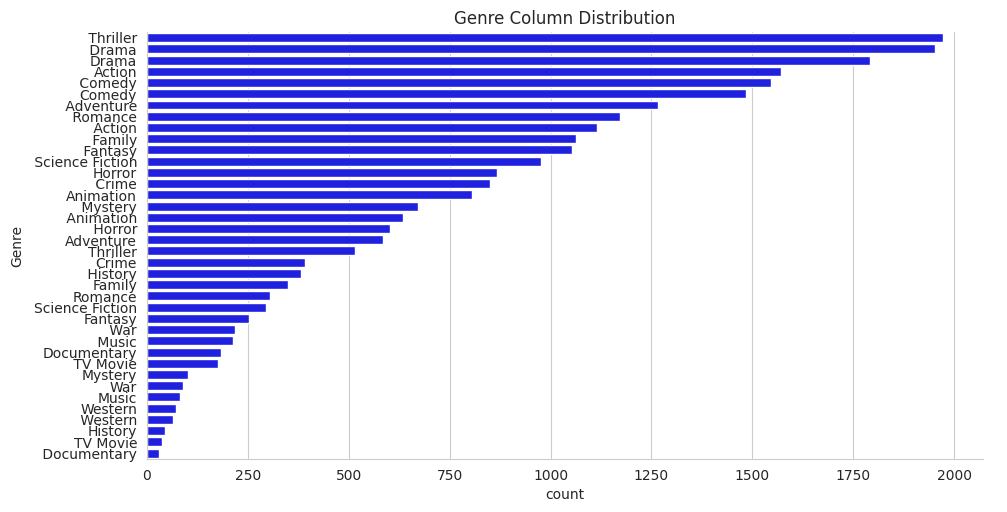

In [75]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index,
           color = 'blue',aspect = 2
           )
plt.title("Genre Column Distribution")
plt.show()

# Which has highest votes in avg_vote Column

Text(0.5, 1.0, 'Vote Distribution')

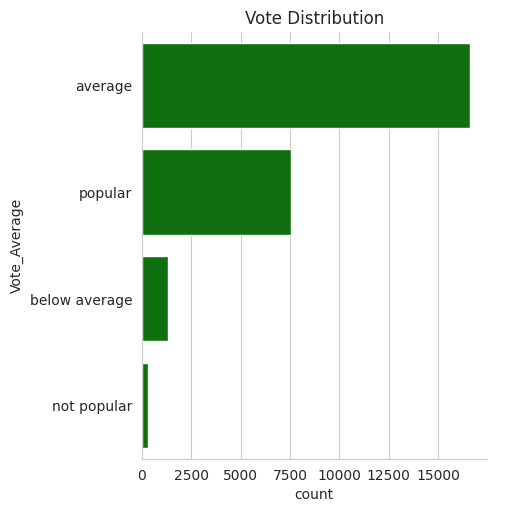

In [76]:
sns.catplot(y = "Vote_Average", data =df, kind = 'count',order = df['Vote_Average'].value_counts().index,
           color = 'green'
           )

plt.title('Vote Distribution')

# what movie got the highest popularity? What's it's Genre

In [77]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest Popularity?

In [78]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


# which year has most filmmed movies?

<Axes: >

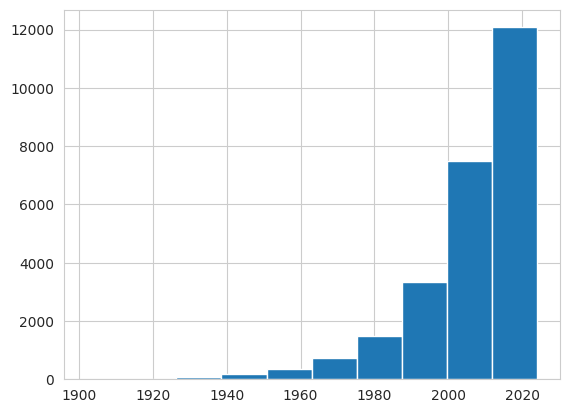

In [79]:
df['Release_Date'].hist()

# Conclusion Summary :

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.

Q2: What genres has highest votes ?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.

Q3: What movie got the highest popularity ? what's its genre ?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

Q3: What movie got the lowest popularity ? what's its genre ?

The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.

Q4: Which year has the most filmmed movies?

year 2020 has the highest filmming rate in our dataset.

### More Advanced Analysis Questions


*   **Temporal Analysis of Releases:** How has the number of movie releases changed over the years? Identifying trends in release frequency can be valuable.
*   **Popularity Trends over Time:** How has the average popularity of movies changed over the years? Are there any noticeable patterns or shifts in audience preferences?
*   **Genre Popularity Trends:** How has the popularity of different genres evolved over time? This can reveal which genres are gaining or losing traction.
*   **Relationship between Vote Count, Vote Average, and Popularity:** Is there a strong correlation between the number of votes, the average vote, and a movie's popularity?
*   **Distribution of Popularity and Vote Metrics:** Visualize the distribution of popularity, vote count, and vote average to understand their spread and identify potential outliers.
*   **Analyzing the Impact of Release Year on Popularity/Vote Average:** Do newer movies tend to have higher popularity or vote averages?
*   **Most Popular Genres by Year:** Which genres were most popular in specific years?
*   **Identifying Top Movies by Genre and Vote Average:** Find the top-rated movies within each genre based on their vote average.

### Temporal Analysis of Releases

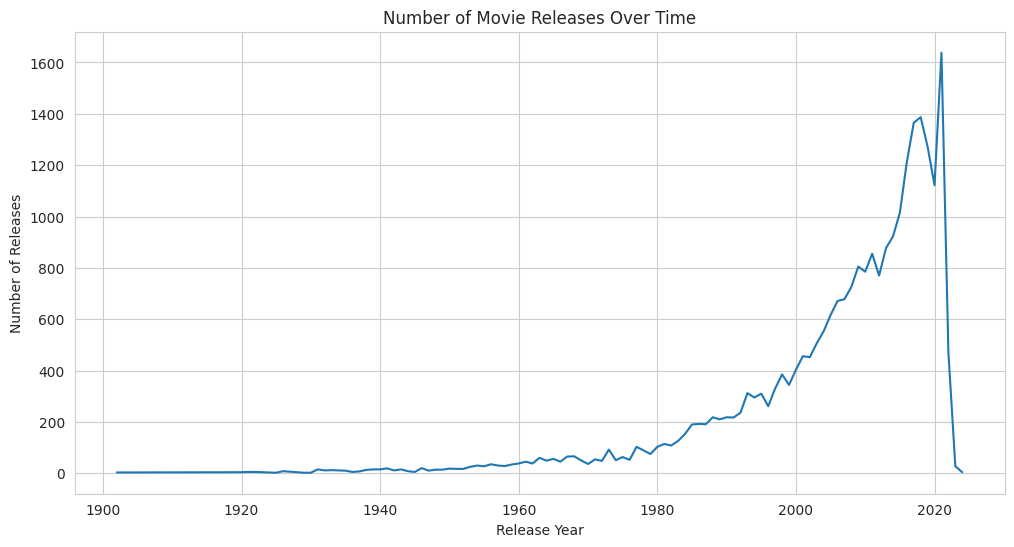

In [80]:
# Group by release year and count the number of movies
releases_by_year = df.groupby('Release_Date').size().reset_index(name='Number of Releases')

# Plot the number of releases over time
plt.figure(figsize=(12, 6))
sns.lineplot( releases_by_year,x='Release_Date', y='Number of Releases')
plt.title('Number of Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()

# Summary of the graph: This line plot shows the trend of movie releases over the years.
# We can observe how the number of releases has changed, identifying periods of growth, decline, or stability.
#Here we can see that the trend of movies release increses from 1960 and goes on increaseing upto 2020.2020 was the Peak point of movies released

### Popularity Trends over Time

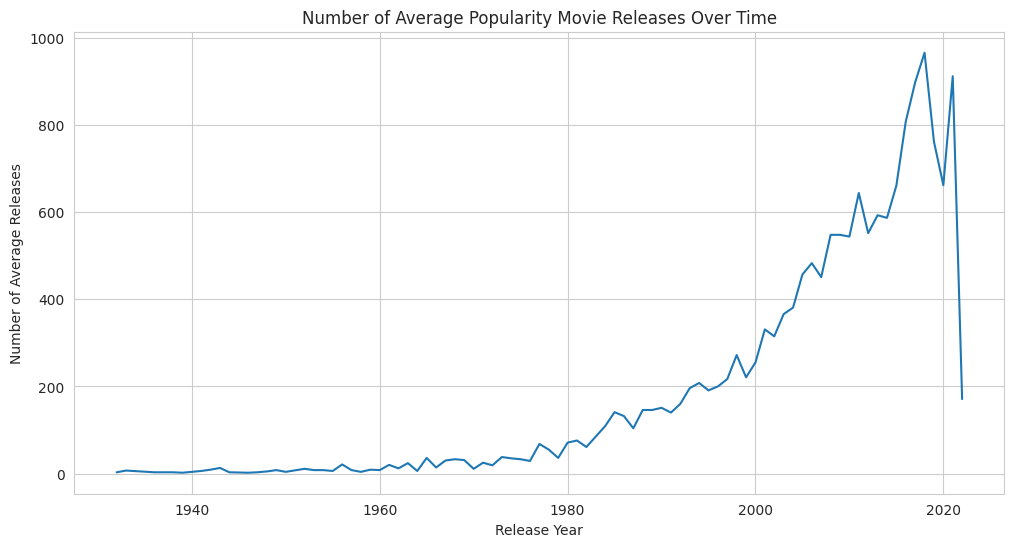

In [81]:

average_popularity_movies = df[df['Vote_Average'] == 'average'].copy()
#By using .copy(), you are explicitly telling pandas: "I want a completely independent duplicate of this filtered data. Any changes I make to this new object should not affect the original DataFrame."

average_releases_by_year = average_popularity_movies.groupby('Release_Date').size().reset_index(name='Number of Average Releases')

# Plot the number of average releases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_Date', y='Number of Average Releases', data=average_releases_by_year)
plt.title('Number of Average Popularity Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Average Releases')
plt.show()

#Here you can analyze the peak of avg movies released lie between 2000 to 2019,2020.

### Genre Popularity Trends

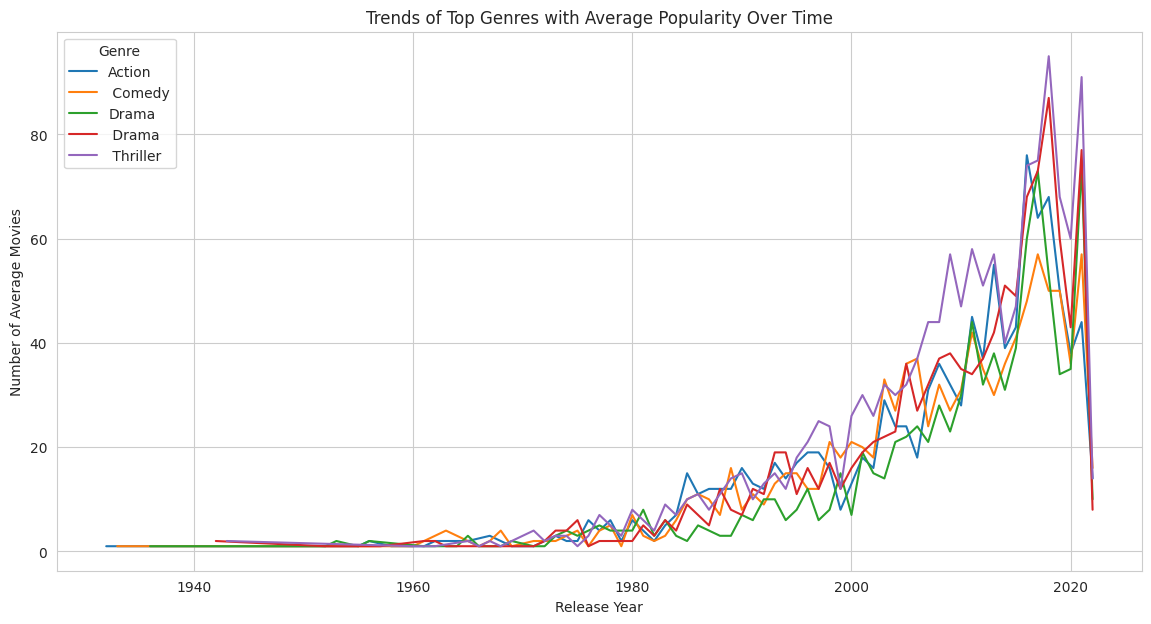

In [82]:
filt = df[df['Vote_Average'] == 'average'].copy()

# Group by release year and genre and calculate the count of average movies
genre_popularity_by_year = filt.groupby(['Release_Date', 'Genre']).size().reset_index(name='Popularity')

# You can then plot the popularity for specific genres or the top genres over time
top_genres = df['Genre'].value_counts().nlargest(5).index
df_top_genres = genre_popularity_by_year[genre_popularity_by_year['Genre'].isin(top_genres)].copy()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Release_Date', y='Popularity', hue='Genre', data=df_top_genres)
plt.title('Trends of Top Genres with Average Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Average Movies')
plt.legend(title='Genre')
plt.show()

### Relationship between Vote Count, Vote Average, and Popularity

Correlation between Popularity and Vote_Count:
            Popularity  Vote_Count
Popularity    1.000000    0.146358
Vote_Count    0.146358    1.000000


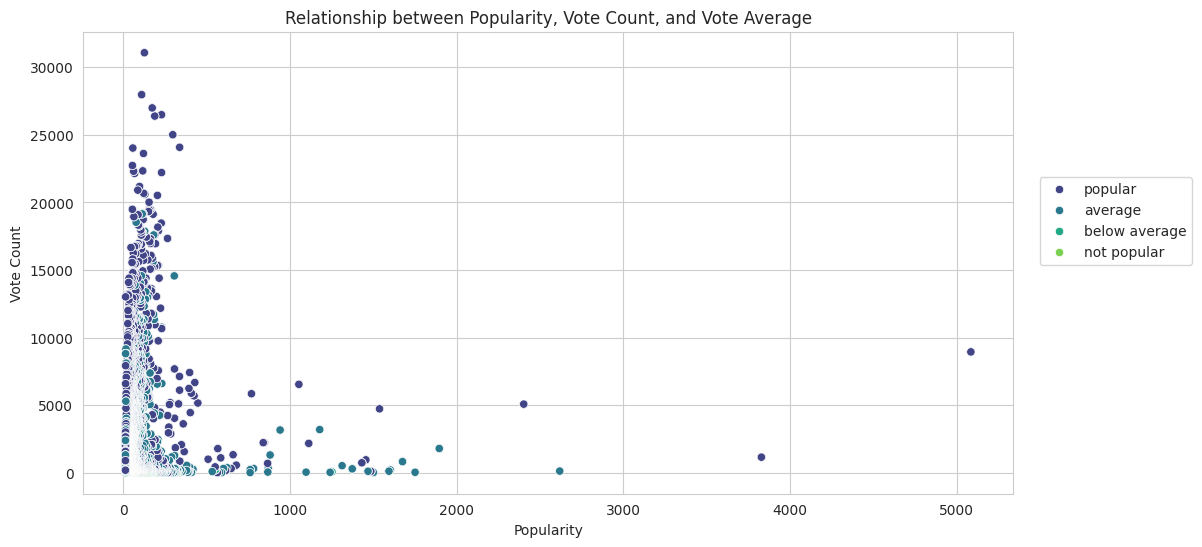

In [83]:
correlation = df[['Popularity', 'Vote_Count']].corr()

# Print the correlation
print("Correlation between Popularity and Vote_Count:")
print(correlation)

'''A correlation coefficient of 0.146358 suggests a weak positive linear correlation between 'Popularity' and 'Vote_Count'.
 This means there is a slight tendency for movies with higher vote counts to have higher popularity, but the relationship is not very strong.'''

#Checking Visually
plt.figure(figsize = (12,6))
sns.scatterplot( df, x = 'Popularity',y ='Vote_Count',hue = 'Vote_Average',palette = 'viridis')
plt.title('Relationship between Popularity, Vote Count, and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.legend(bbox_to_anchor = (1,0.5,0.2,0.2))
plt.show()

### Distribution of Popularity and Vote Metrics

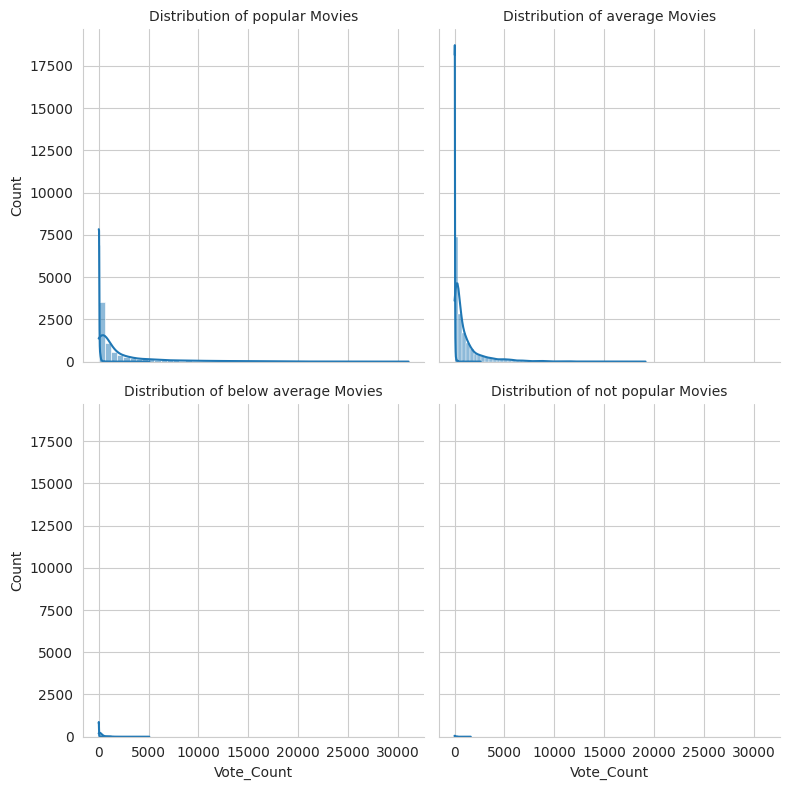

In [84]:
# Create a FacetGrid based on 'Vote_Average'
g = sns.FacetGrid(df, col='Vote_Average', col_wrap=2, height=4)

# Map histograms to the FacetGrid for Popularity and Vote_Count
g.map(sns.histplot, 'Popularity', bins=50, kde=True)
g.map(sns.histplot, 'Vote_Count', bins=50, kde=True)

# Add titles to the subplots
g.set_titles("Distribution of {col_name} Movies")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Analyzing the Impact of Release Year on Popularity/Vote Average

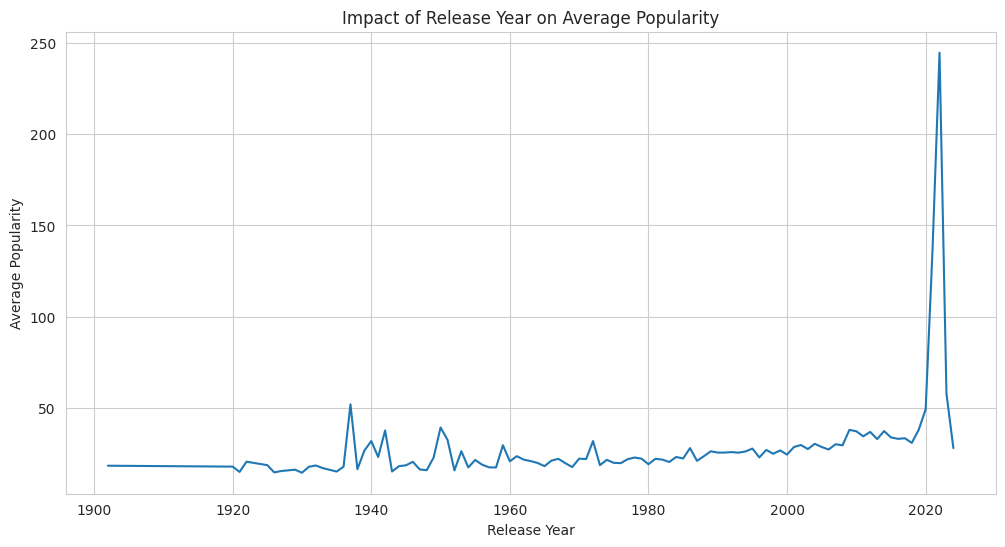

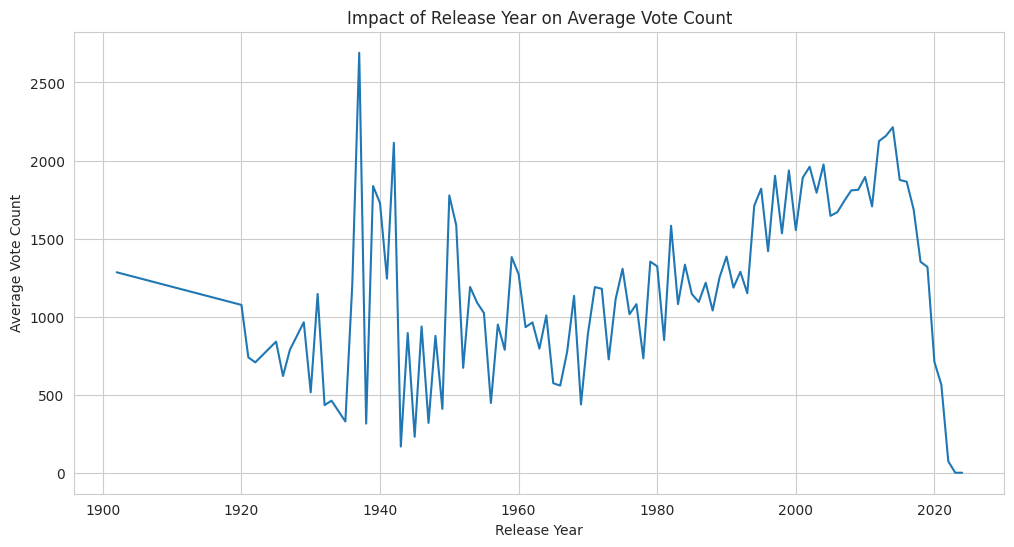

In [85]:
# Group by release year and calculate the mean of Popularity and Vote_Average
impact_by_year = df.groupby('Release_Date')[['Popularity', 'Vote_Count']].mean().reset_index()

# Plot the impact of release year on Popularity
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_Date', y='Popularity', data=impact_by_year)
plt.title('Impact of Release Year on Average Popularity')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# Plot the impact of release year on Vote_Count
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_Date', y='Vote_Count', data=impact_by_year)
plt.title('Impact of Release Year on Average Vote Count')
plt.xlabel('Release Year')
plt.ylabel('Average Vote Count')
plt.show()

### Most Popular Genres by Year

In [87]:
# Group by release year and genre, count occurrences
genre_counts_by_year = df.groupby(['Release_Date', 'Genre']).size().reset_index(name='Count')

# Find the most popular genre for each year
most_popular_genre_by_year = genre_counts_by_year.loc[genre_counts_by_year.groupby('Release_Date')['Count'].idxmax()]

print("Most Popular Genre by Year:")
display(most_popular_genre_by_year)

Most Popular Genre by Year:


,Release_Date,Genre,Count
0,1902,Fantasy,1
3,1920,Crime,1
7,1921,Drama,1
13,1922,Horror,2
16,1925,History,1
...,...,...,...
2139,2020,Drama,85
2194,2021,Drama,133
2223,2022,Thriller,35
2251,2023,Science Fiction,5


from matplotlib import pyplot as plt
most_popular_genre_by_year['Release_Date'].plot(kind='hist', bins=20, title='Release_Date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_popular_genre_by_year['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_popular_genre_by_year.plot(kind='scatter', x='Release_Date', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Release_Date']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = most_popular_genre_by_year.sort_values('Release_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release_Date')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Release_Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Release_Date'}, axis=1)
              .sort_values('Release_Date', ascending=True))
  xs = counted['Release_Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = most_popular_genre_by_year.sort_values('Release_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release_Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
most_popular_genre_by_year['Release_Date'].plot(kind='line', figsize=(8, 4), title='Release_Date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
most_popular_genre_by_year['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

### Identifying Top Movies by Genre and Vote Average

In [88]:
# Function to get the top N movies by Vote_Count for each genre
def get_top_movies_by_vote_count(dataframe, n=5):
    top_movies = dataframe.groupby('Genre').apply(lambda x: x.nlargest(n, 'Vote_Count')).reset_index(drop=True)
    return top_movies

# Get the top 5 movies by vote count for each genre
top_movies_by_vote = get_top_movies_by_vote_count(df)

print("Top 5 Movies by Vote Count for Each Genre:")
display(top_movies_by_vote)

Top 5 Movies by Vote Count for Each Genre:


/tmp/ipython-input-458129969.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies = dataframe.groupby('Genre').apply(lambda x: x.nlargest(n, 'Vote_Count')).reset_index(drop=True)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2008,The Dark Knight,173.923,26994,popular,Action
1,2012,The Avengers,229.772,26490,popular,Action
2,2018,Avengers: Infinity War,338.402,24079,popular,Action
3,2001,The Lord of the Rings: The Fellowship of the Ring,129.852,20602,popular,Action
4,2019,Avengers: Endgame,205.308,20521,popular,Action
...,...,...,...,...,...,...
185,2015,The Revenant,53.111,15554,popular,Western
186,1966,"The Good, the Bad and the Ugly",45.733,6479,popular,Western
187,2002,Spirit: Stallion of the Cimarron,100.856,3753,popular,Western
188,2016,Hell or High Water,22.905,3647,popular,Western


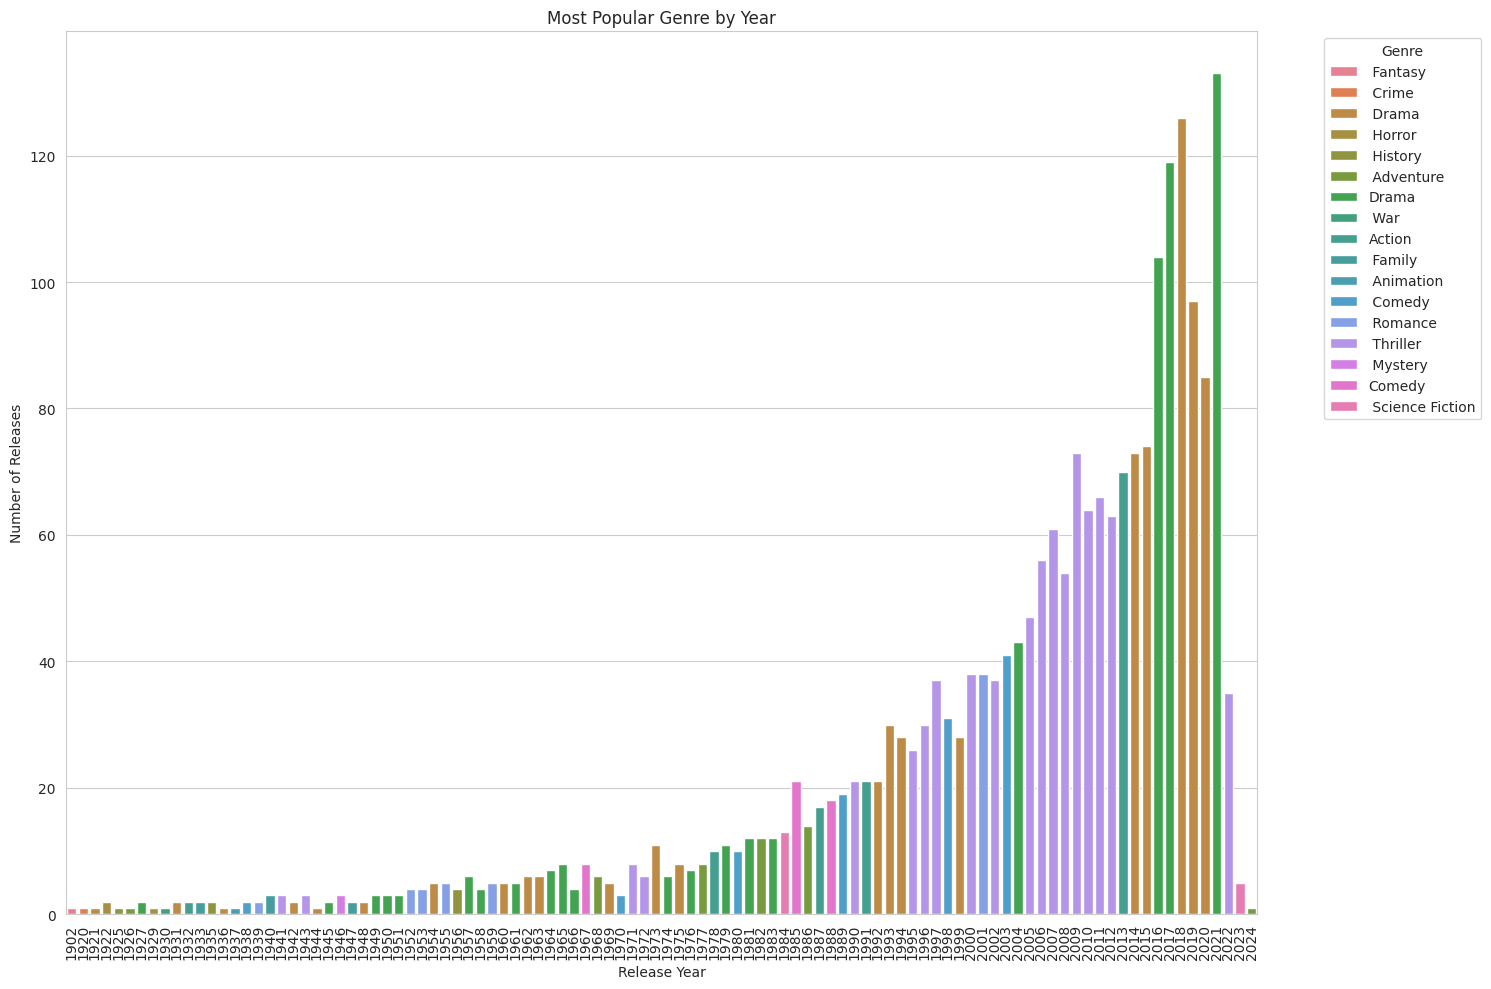

In [89]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Release_Date', y='Count', hue='Genre', data=most_popular_genre_by_year, dodge=False)
plt.title('Most Popular Genre by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()